# Covid-19 Project

In [2]:
import numpy as np
import pandas as pd
from numpy import nan
import scipy
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

Load the data

In [3]:
address = 'D:\COVID-19Research\dataset.csv'
covid = pd.read_csv(address)
covid.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,30,male,"Chaohu City, Hefei City",Anhui,China,31.646960,117.7166,admin3,18.01.2020,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181.0,NaN,NaN
1,000-1-1,60-69,female,Whatcom County,Washington,United States,48.826129,-121.71928999999999,admin2,NaN,...,NaN,NaN,NaN,NaN,Whatcom County,Washington,United States,2994.0,NaN,NaN
2,000-1-10,30,male,Hefei City,Anhui,China,31.794440,117.3428,admin2,17.01.2020,...,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100.0,NaN,NaN
3,000-1-10,60-69,female,Pitkin County,Colorado,United States,39.217302,-106.91528000000001,admin2,NaN,...,NaN,NaN,NaN,NaN,Pitkin County,Colorado,United States,291.0,NaN,NaN
4,000-1-100,44,male,NaN,Zurich,Switzerland,47.417813,8.65596766,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Zurich,Switzerland,26.0,NaN,NaN


Drop the columns that has all the null values

In [4]:
covid.drop(columns = ['admin1','admin2','admin3','admin_id','notes_for_discussion','location','data_moderator_initials','latitude','longitude','date_onset_symptoms','outcome','source','additional_information','reported_market_exposure','geo_resolution','province'],axis=1, inplace=True)
covid.head()


,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
0,000-1-1,30,male,"Chaohu City, Hefei City",China,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,China,NaN
1,000-1-1,60-69,female,Whatcom County,United States,NaN,10.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN
2,000-1-10,30,male,Hefei City,China,22.01.2020,23.01.2020,NaN,yes,21.01.2020,Wuhan,NaN,NaN,NaN,NaN,China,NaN
3,000-1-10,60-69,female,Pitkin County,United States,NaN,11.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN
4,000-1-100,44,male,NaN,Switzerland,NaN,07.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,https://github.com/openZH/covid_19,NaN,Switzerland,NaN


Drop the specific rows from the mentioned columns

In [5]:
covid = covid[covid['symptoms'].notna()]
covid = covid[covid['travel_history_location'].notna()]
covid = covid[covid['sex'].notna()]
covid = covid[covid['age'].notna()]
covid = covid[covid['date_death_or_discharge'].notna()]
covid

,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
826,000-1-10674,29,male,"Luzzara, Reggio Emilia",Italy,NaN,06.02.2020,"eye irritation, fever",no,03.02.2020,Wuhan,NaN,NaN,NaN,22.02.2020,Italy,NaN
2479,000-1-12047,30,female,Paris,France,24.01.2020,24.01.2020,"chills, cough, fatigue, fever",yes,19.01.2020,Wuhan,NaN,NaN,NaN,12.02.2020,France,NaN
2481,000-1-12048,31,male,Paris,France,24.01.2020,24.01.2020,"chills, conjunctivitis, cough, fever",yes,19.01.2020,Wuhan,NaN,NaN,NaN,12.02.2020,France,NaN
4199,000-1-13455,52,female,East Coast Demerara,Guyana,NaN,11.03.2020,"severe, kidney failure and hypertension",NaN,05.03.2020,"New York, New York, USA",1,"diabetes, hypertension",NaN,11.03.2020,NaN,NaN
7679,000-1-164,29,male,Fangchenggang City,China,23.01.2020,24.01.2020,discomfort,no,23.01.2020,"Ezhou City, Hubei",NaN,NaN,NaN,28.01.2020,China,NaN


Data Visualization

Used ScatterPlots


In [21]:
from pandas.plotting import scatter_matrix
from pylab import rcParams
import seaborn as sb
#sb.set_style('whitegrid')
%matplotlib inline
rcParams['figure.figsize']=5,4


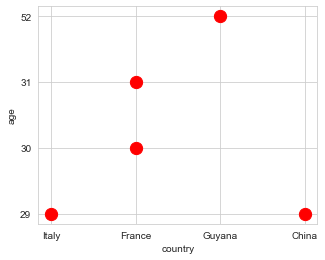

In [23]:
covid.plot(kind='scatter',x='country',y ='age',c=['red'],s=150)

Convert the categorical data to Numeric Data

In [9]:
covid["travel_history_location"].replace({"Wuhan":1},inplace=True)
covid["travel_history_location"].replace({"New York, New York, USA":2},inplace=True)
covid["travel_history_location"].replace({"Ezhou City, Hubei":3},inplace=True)

In [10]:
covid.head()

,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
826,000-1-10674,29,male,"Luzzara, Reggio Emilia",Italy,NaN,06.02.2020,"eye irritation, fever",no,03.02.2020,1,NaN,NaN,NaN,22.02.2020,Italy,NaN
2479,000-1-12047,30,female,Paris,France,24.01.2020,24.01.2020,"chills, cough, fatigue, fever",yes,19.01.2020,1,NaN,NaN,NaN,12.02.2020,France,NaN
2481,000-1-12048,31,male,Paris,France,24.01.2020,24.01.2020,"chills, conjunctivitis, cough, fever",yes,19.01.2020,1,NaN,NaN,NaN,12.02.2020,France,NaN
4199,000-1-13455,52,female,East Coast Demerara,Guyana,NaN,11.03.2020,"severe, kidney failure and hypertension",NaN,05.03.2020,2,1,"diabetes, hypertension",NaN,11.03.2020,NaN,NaN
7679,000-1-164,29,male,Fangchenggang City,China,23.01.2020,24.01.2020,discomfort,no,23.01.2020,3,NaN,NaN,NaN,28.01.2020,China,NaN


In [11]:
covid["date_death_or_discharge"].replace({"22.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"12.02.2020":2},inplace=True)
covid["date_death_or_discharge"].replace({"11.03.2020":3},inplace=True)
covid["date_death_or_discharge"].replace({"28.01.2020":1},inplace=True)
covid.head()

,ID,age,sex,city,country,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,chronic_disease_binary,chronic_disease,sequence_available,date_death_or_discharge,country_new,travel_history_binary
826,000-1-10674,29,male,"Luzzara, Reggio Emilia",Italy,NaN,06.02.2020,"eye irritation, fever",no,03.02.2020,1,NaN,NaN,NaN,2,Italy,NaN
2479,000-1-12047,30,female,Paris,France,24.01.2020,24.01.2020,"chills, cough, fatigue, fever",yes,19.01.2020,1,NaN,NaN,NaN,2,France,NaN
2481,000-1-12048,31,male,Paris,France,24.01.2020,24.01.2020,"chills, conjunctivitis, cough, fever",yes,19.01.2020,1,NaN,NaN,NaN,2,France,NaN
4199,000-1-13455,52,female,East Coast Demerara,Guyana,NaN,11.03.2020,"severe, kidney failure and hypertension",NaN,05.03.2020,2,1,"diabetes, hypertension",NaN,3,NaN,NaN
7679,000-1-164,29,male,Fangchenggang City,China,23.01.2020,24.01.2020,discomfort,no,23.01.2020,3,NaN,NaN,NaN,1,China,NaN


# Correlation Analysis

CHI-Square Test for Independence Test

Ho = mortality rate is independent of travel_history records .
H1 = mortality rate is dependent of travel_history records.

Conditions:
if p<0.05 -> Reject the null hypothesis and conclude that the variables are correlated
if p > 0.05 -> Accept the null hypothesis and conclude that the variables are independent

**date_death_or_discharge , travel_history_location variables are considered**

In [12]:
mortality = covid['date_death_or_discharge']
travel_history = covid['travel_history_location']

table = pd.crosstab(mortality, travel_history)
from scipy.stats import chi2_contingency
chi2, p, dof,expected = chi2_contingency(table.values)
print('Chi-square %0.3f p_value %0.3f' % (chi2,p))


Chi-square 10.000 p_value 0.040


p_value is .04 therefore, we reject the null hypthosis.